In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
plt.rcParams['font.family'] = ["Arial"]
plt.rcParams['font.size'] = 14

In [3]:
MCI_AD_folds_data_neighbor = [
    {'MCC': 0.6060598571656328, 'Accuracy': 0.803921568627451, 'Precision': 0.8064146890263502},
    {'MCC': 0.33679239361247176, 'Accuracy': 0.6831683168316832, 'Precision': 0.6969529882770361},
    {'MCC': 0.5419871253027571, 'Accuracy': 0.7821782178217822, 'Precision': 0.7812009772405812},
    {'MCC': 0.5685851736753468, 'Accuracy': 0.7821782178217822, 'Precision': 0.8152858764137283},
    {'MCC': 0.6511926915987009, 'Accuracy': 0.8316831683168316, 'Precision': 0.8311426676166377}
]

In [4]:
MCI_AD_folds_data_weights = [
    {'MCC': 0.8622762373379869, 'Accuracy': 0.9313725490196079, 'Precision': 0.9316448801742919},
    {'MCC': 0.8302187796948217, 'Accuracy': 0.9207920792079208, 'Precision': 0.9224546514801856},
    {'MCC': 0.9078861788617886, 'Accuracy': 0.9003960396039604, 'Precision': 0.9303960396039604},
    {'MCC': 0.8368648214961731, 'Accuracy': 0.9207920792079208, 'Precision': 0.93021425093329},
    {'MCC': 0.8792778495637553, 'Accuracy': 0.9405940594059405, 'Precision': 0.9416994331012049}
]

In [5]:
MCI_AD_folds_data = [
    {'MCC': 0.8819483981655083, 'Accuracy': 0.9411764705882353, 'Precision': 0.9416809998853342},
    {'MCC': 0.8728916024679397, 'Accuracy': 0.9405940594059405, 'Precision': 0.9420498440821525},
    {'MCC': 0.9383751635074703, 'Accuracy': 0.9702970297029703, 'Precision': 0.9703741275766922},
    {'MCC': 0.8697189240243599, 'Accuracy': 0.9405940594059405, 'Precision': 0.9421849877295421},
    {'MCC': 0.9197920205518663, 'Accuracy': 0.9603960396039604, 'Precision': 0.9613987714560929}    
]

In [9]:
# 计算MCC的均值
mcc_values = [item['MCC'] for item in MCI_AD_folds_data]
mcc_mean = sum(mcc_values) / len(mcc_values)

mcc_mean

0.896545221743429

In [ ]:
54.09%、86.33%、89.65%

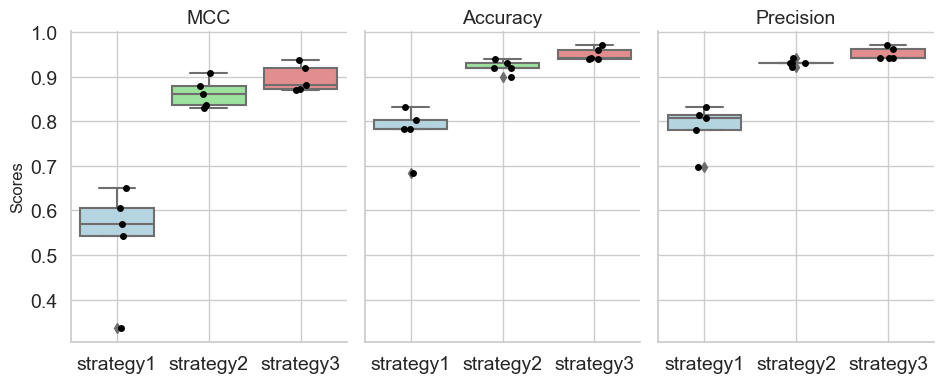

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 数据准备
neighbor_df = pd.DataFrame(MCI_AD_folds_data_neighbor)
weight_df = pd.DataFrame(MCI_AD_folds_data_weights)
MCI_AD_df = pd.DataFrame(MCI_AD_folds_data)

# 为数据添加组标签
neighbor_df['Group'] = 'strategy1'
weight_df['Group'] = 'strategy2'
MCI_AD_df['Group'] = 'strategy3'

# 合并数据集
combined_df = pd.concat([neighbor_df, weight_df, MCI_AD_df])

# 转换数据为长格式，便于绘图
combined_long = combined_df.melt(id_vars=["Group"], var_name="Metric", value_name="Score")

# 设置图形样式
sns.set(style="whitegrid")

# 使用 FacetGrid 按 Metric 分组绘制图形
g = sns.FacetGrid(combined_long, col="Metric", height=4, aspect=0.8, col_wrap=3)
g.map_dataframe(sns.boxplot, x='Group', y='Score', palette=['lightblue', 'lightgreen', 'lightcoral'])#,'lavender'
g.map_dataframe(sns.stripplot, x='Group', y='Score', color='black', jitter=True, size=5)

# 设置图形标题和标签
g.set_titles("{col_name}")
g.set_axis_labels("", "Scores")
for ax in g.axes.flat:
    # 设置刻度字体大小
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_xlabel("")
    ax.set_title(ax.get_title(), fontsize=14)
    ax.xaxis.grid(True)  
    #ax.yaxis.grid(True)# 添加水平网格线
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()
